In [1]:
import requests #On importe le module requests pour pouvoir faire des requêtes HTTP

In [2]:
standings_url = 'https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats' #L'url avec laquelle on va récupérer le classement de premire leag


In [3]:
data = requests.get(standings_url, headers = {"Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
"User-Agent" : "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0"
})

In [4]:
data.text #On affiche la réponse en fesant .text sinon on obtient uniquement le status code

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202404231" />\n<script src="https://cmp.osano.com/16CGnCU8UtNhM14sg/973fed8c-02f7-4f57-9c53-0311ec79de9b/osano.js"></script>\n\n<!-- inmobi-ssi -->  \n<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->\n<script type="text/javascript" async=true>\n(function() {\n  var host = window.location.hostname;\n  var element = document.createElement(\'script\');\n  var firstScript = document.getElementsByTagName(\'script\')[0];\n  var url = \'https://cmp.inmobi.com\'\n    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js?tag_version=V3\');\n  var uspTries = 0;\n  var uspTriesLimit = 3;\n  element.

In [5]:
from bs4 import BeautifulSoup #On importe BeautifulSoup

In [6]:
soup = BeautifulSoup(data.text) #On transforme le contenu de notre page en objet BeautifulSoup

In [7]:
standings_table = soup.select("table.stats_table")[0] #On selectionne que le premier tableau "Overall" parmi tout les tableaux de class = "stats_table"

In [8]:
links = standings_table.find_all('a') #On stock dans une liste tout les éléments avec une balise a find_all RETOURNE UN TABLEAU

In [9]:
links = [l.get ('href') for l in links] #On stock le href de chaque élément a en tant qu'élément unique dans la liste links

In [10]:
links = [l for l in links if 'squads' in l] #On stock tout les liens (href) contenant '/squads/'

In [11]:
links

['/en/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 '/en/squads/18bb7c10/2022-2023/Arsenal-Stats',
 '/en/squads/19538871/2022-2023/Manchester-United-Stats',
 '/en/squads/b2b47a98/2022-2023/Newcastle-United-Stats',
 '/en/squads/822bd0ba/2022-2023/Liverpool-Stats',
 '/en/squads/d07537b9/2022-2023/Brighton-and-Hove-Albion-Stats',
 '/en/squads/8602292d/2022-2023/Aston-Villa-Stats',
 '/en/squads/361ca564/2022-2023/Tottenham-Hotspur-Stats',
 '/en/squads/cd051869/2022-2023/Brentford-Stats',
 '/en/squads/fd962109/2022-2023/Fulham-Stats',
 '/en/squads/47c64c55/2022-2023/Crystal-Palace-Stats',
 '/en/squads/cff3d9bb/2022-2023/Chelsea-Stats',
 '/en/squads/8cec06e1/2022-2023/Wolverhampton-Wanderers-Stats',
 '/en/squads/7c21e445/2022-2023/West-Ham-United-Stats',
 '/en/squads/4ba7cbea/2022-2023/Bournemouth-Stats',
 '/en/squads/e4a775cb/2022-2023/Nottingham-Forest-Stats',
 '/en/squads/d3fd31cc/2022-2023/Everton-Stats',
 '/en/squads/a2d435b3/2022-2023/Leicester-City-Stats',
 '/en/squads/5bfb9659/2

In [12]:
len(links) #On voit bien qu'on a 20 équipes

20

In [13]:
team_urls = [f'https://fbref.com/{l}' for l in links] #On complete les liens de chaque équipe avec le préfixe identique

In [14]:
team_urls

['https://fbref.com//en/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com//en/squads/18bb7c10/2022-2023/Arsenal-Stats',
 'https://fbref.com//en/squads/19538871/2022-2023/Manchester-United-Stats',
 'https://fbref.com//en/squads/b2b47a98/2022-2023/Newcastle-United-Stats',
 'https://fbref.com//en/squads/822bd0ba/2022-2023/Liverpool-Stats',
 'https://fbref.com//en/squads/d07537b9/2022-2023/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com//en/squads/8602292d/2022-2023/Aston-Villa-Stats',
 'https://fbref.com//en/squads/361ca564/2022-2023/Tottenham-Hotspur-Stats',
 'https://fbref.com//en/squads/cd051869/2022-2023/Brentford-Stats',
 'https://fbref.com//en/squads/fd962109/2022-2023/Fulham-Stats',
 'https://fbref.com//en/squads/47c64c55/2022-2023/Crystal-Palace-Stats',
 'https://fbref.com//en/squads/cff3d9bb/2022-2023/Chelsea-Stats',
 'https://fbref.com//en/squads/8cec06e1/2022-2023/Wolverhampton-Wanderers-Stats',
 'https://fbref.com//en/squads/7c21e445/2022-2023/West-Ham

In [15]:
team_url =team_urls[0] #On prend man city par exemple

In [16]:
team_url

'https://fbref.com//en/squads/b8fd03ef/2022-2023/Manchester-City-Stats'

In [17]:
data = requests.get(team_url) #On fait une requête get vers le lien ci-dessus

In [18]:
data.text #.text sinon on aura le status code

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202404231" />\n<script src="https://cmp.osano.com/16CGnCU8UtNhM14sg/973fed8c-02f7-4f57-9c53-0311ec79de9b/osano.js"></script>\n\n<!-- inmobi-ssi -->  \n<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->\n<script type="text/javascript" async=true>\n(function() {\n  var host = window.location.hostname;\n  var element = document.createElement(\'script\');\n  var firstScript = document.getElementsByTagName(\'script\')[0];\n  var url = \'https://cmp.inmobi.com\'\n    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js?tag_version=V3\');\n  var uspTries = 0;\n  var uspTriesLimit = 3;\n  element.

In [19]:
import pandas as pd #Import de la librairie pandas pour manipuler les données

In [20]:
matches = pd.read_html(data.text, match="Scores & Fixtures") #read_html retourne une liste

In [21]:
matches

[          Date   Time              Comp                Round  Day    Venue  \
 0   2022-07-30  17:00  Community Shield  FA Community Shield  Sat  Neutral   
 1   2022-08-07  16:30    Premier League          Matchweek 1  Sun     Away   
 2   2022-08-13  15:00    Premier League          Matchweek 2  Sat     Home   
 3   2022-08-21  16:30    Premier League          Matchweek 3  Sun     Away   
 4   2022-08-27  15:00    Premier League          Matchweek 4  Sat     Home   
 ..         ...    ...               ...                  ...  ...      ...   
 56  2023-05-21  16:00    Premier League         Matchweek 37  Sun     Home   
 57  2023-05-24  20:00    Premier League         Matchweek 32  Wed     Away   
 58  2023-05-28  16:30    Premier League         Matchweek 38  Sun     Away   
 59  2023-06-03  15:00            FA Cup                Final  Sat  Neutral   
 60  2023-06-10  22:00      Champions Lg                Final  Sat  Neutral   
 
    Result  GF  GA        Opponent   xG  xGA  Poss

In [22]:
matches[0] #Notre liste contient UNE seule DF donc on l'extrait

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-07-30,17:00,Community Shield,FA Community Shield,Sat,Neutral,L,1,3,Liverpool,NaN,NaN,57,NaN,Rúben Dias,4-3-3,Craig Pawson,Match Report,NaN
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,2.2,0.5,75,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,1.7,0.1,67,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,2.1,1.8,69,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,2.2,0.1,74,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023-05-21,16:00,Premier League,Matchweek 37,Sun,Home,W,1,0,Chelsea,1.2,1.2,64,53490.0,Kyle Walker,3-4-3◆,Michael Oliver,Match Report,NaN
57,2023-05-24,20:00,Premier League,Matchweek 32,Wed,Away,D,1,1,Brighton,1.8,2.2,60,31388.0,İlkay Gündoğan,4-3-3,Simon Hooper,Match Report,NaN
58,2023-05-28,16:30,Premier League,Matchweek 38,Sun,Away,L,0,1,Brentford,1.6,1.3,65,17120.0,Kyle Walker,3-2-4-1,John Brooks,Match Report,NaN
59,2023-06-03,15:00,FA Cup,Final,Sat,Neutral,W,2,1,Manchester Utd,NaN,NaN,60,83179.0,İlkay Gündoğan,3-2-4-1,Paul Tierney,Match Report,NaN


In [23]:
soup = BeautifulSoup(data.text) #soup devient un objet BeautifulSoup que l'on peut scrapper

In [24]:
links = soup.find_all('a') #On récupére toutes les balises a dans une list qui s'appelle links

In [25]:
links

[<a class="pt" href="https://fbref.com/pt/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('pt');">Português</a>,
 <a class="en" href="https://fbref.com/en/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('en');">English</a>,
 <a class="fr" href="https://fbref.com/fr/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('fr');">Français</a>,
 <a class="it" href="https://fbref.com/it/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('it');">Italiano</a>,
 <a class="de" href="https://fbref.com/de/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('de');">Deutsch</a>,
 <a class="es" href="https://fbref.com/es/squads/b8fd03ef/2022-2023/Manchester-City-Stats" onclick="sr_set_trans_choice('es');">Español</a>,
 <a href="https://www.sports-reference.com/?utm_source=fb&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav"><svg height="15px" width="20px"><use

In [26]:
links = [l.get('href') for l in links] #On récupère le lien (href) de chaque élément de la liste links

In [27]:
links

['https://fbref.com/pt/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com/en/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com/fr/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com/it/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com/de/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://fbref.com/es/squads/b8fd03ef/2022-2023/Manchester-City-Stats',
 'https://www.sports-reference.com/?utm_source=fb&utm_medium=sr_xsite&utm_campaign=2023_01_srnav',
 'https://www.baseball-reference.com/?utm_source=fb&utm_medium=sr_xsite&utm_campaign=2023_01_srnav',
 'https://www.pro-football-reference.com/?utm_source=fb&utm_medium=sr_xsite&utm_campaign=2023_01_srnav',
 'https://www.sports-reference.com/cfb/',
 'https://www.basketball-reference.com/?utm_source=fb&utm_medium=sr_xsite&utm_campaign=2023_01_srnav',
 'https://www.sports-reference.com/cbb/',
 'https://www.hockey-reference.com/?utm_source=fb&utm_medium=sr_xsite&

In [28]:
links=[l for l in links if l and 'all_comps/shooting' in l] #On séléctionne les liens qui contiennent "all_comps/shooting"

In [29]:
links #On re affiche les liens

['/en/squads/b8fd03ef/2022-2023/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2022-2023/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2022-2023/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2022-2023/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions']

In [30]:
data = requests.get(f'http://fbref.com{links[0]}') #data devient une url valide en ajoutant la f string au debut

In [31]:
shooting_stats = pd.read_html(data.text, match = "Shooting")[0] #

In [32]:
shooting_stats

For Manchester City                                                     \
                  Date   Time              Comp                Round  Day   
0           2022-07-30  17:00  Community Shield  FA Community Shield  Sat   
1           2022-08-07  16:30    Premier League          Matchweek 1  Sun   
2           2022-08-13  15:00    Premier League          Matchweek 2  Sat   
3           2022-08-21  16:30    Premier League          Matchweek 3  Sun   
4           2022-08-27  15:00    Premier League          Matchweek 4  Sat   
..                 ...    ...               ...                  ...  ...   
57          2023-05-24  20:00    Premier League         Matchweek 32  Wed   
58          2023-05-28  16:30    Premier League         Matchweek 38  Sun   
59          2023-06-03  15:00            FA Cup                Final  Sat   
60          2023-06-10  22:00      Champions Lg                Final  Sat   
61                 NaN    NaN               NaN                  NaN  NaN   

                                              ... Standard                  \
      Venue Result   GF   GA        Opponent  ...     Dist    FK  PK PKatt   
0   Neutral      L  1.0  3.0       Liverpool  ...      NaN   NaN   0     0   
1      Away      W  2.0  0.0        West Ham  ...     18.7   1.0   1     1   
2      Home      W  4.0  0.0     Bournemouth  ...     17.5   0.0   0     0   
3      Away      D  3.0  3.0   Newcastle Utd  ...     16.2   1.0   0     0   
4      Home      W  4.0  2.0  Crystal Palace  ...     14.1   0.0   0     0   
..      ...    ...  ...  ...             ...  ...      ...   ...  ..   ...   
57     Away      D  1.0  1.0        Brighton  ...     13.9   0.0   0     0   
58     Away      L  0.0  1.0       Brentford  ...     16.8   0.0   0     0   
59  Neutral      W  2.0  1.0  Manchester Utd  ...      NaN   NaN   0     0   
60  Neutral      W  1.0  0.0        it Inter  ...     16.9   0.0   0     0   
61      NaN     --  NaN  NaN             NaN  ...     16.8  24.0  14    18   

   Expected                             Unnamed: 25_level_0  
         xG npxG npxG/Sh   G-xG np:G-xG        Match Report  
0       NaN  NaN     NaN    NaN     NaN        Match Report  
1       2.2  1.4    0.11   -0.2    -0.4        Match Report  
2       1.7  1.7    0.09    1.3     1.3        Match Report  
3       2.1  2.1    0.10    0.9     0.9        Match Report  
4       2.2  2.2    0.13    1.8     1.8        Match Report  
..      ...  ...     ...    ...     ...                 ...  
57      1.8  1.8    0.14   -0.8    -0.8        Match Report  
58      1.6  1.6    0.11   -1.6    -1.6        Match Report  
59      NaN  NaN     NaN    NaN     NaN        Match Report  
60      1.0  1.0    0.14    0.0     0.0        Match Report  
61      NaN  NaN    0.12  148.0   134.0                 NaN  

[62 rows x 26 columns]

In [33]:
shooting_stats.head()

For Manchester City                                                     \
                 Date   Time              Comp                Round  Day   
0          2022-07-30  17:00  Community Shield  FA Community Shield  Sat   
1          2022-08-07  16:30    Premier League          Matchweek 1  Sun   
2          2022-08-13  15:00    Premier League          Matchweek 2  Sat   
3          2022-08-21  16:30    Premier League          Matchweek 3  Sun   
4          2022-08-27  15:00    Premier League          Matchweek 4  Sat   

                                             ... Standard                \
     Venue Result   GF   GA        Opponent  ...     Dist   FK PK PKatt   
0  Neutral      L  1.0  3.0       Liverpool  ...      NaN  NaN  0     0   
1     Away      W  2.0  0.0        West Ham  ...     18.7  1.0  1     1   
2     Home      W  4.0  0.0     Bournemouth  ...     17.5  0.0  0     0   
3     Away      D  3.0  3.0   Newcastle Utd  ...     16.2  1.0  0     0   
4     Home      W  4.0  2.0  Crystal Palace  ...     14.1  0.0  0     0   

  Expected                           Unnamed: 25_level_0  
        xG npxG npxG/Sh G-xG np:G-xG        Match Report  
0      NaN  NaN     NaN  NaN     NaN        Match Report  
1      2.2  1.4    0.11 -0.2    -0.4        Match Report  
2      1.7  1.7    0.09  1.3     1.3        Match Report  
3      2.1  2.1    0.10  0.9     0.9        Match Report  
4      2.2  2.2    0.13  1.8     1.8        Match Report  

[5 rows x 26 columns]

In [34]:
shooting_stats.columns = shooting_stats.columns.droplevel() #On enlève un niveau d'index (ici le niveau "For Manchester City"...)

In [35]:
shooting_stats['Date'].head() #On affiche les 5 premières lignes de la colonne Date

0    2022-07-30
1    2022-08-07
2    2022-08-13
3    2022-08-21
4    2022-08-27
Name: Date, dtype: object

In [36]:
matches = matches[0]

In [37]:
team_data = matches.merge(shooting_stats[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

Ici on fusionne 2 DF pandas. Pour ce faire, nous avons besoin d'une colonne en commun (clé), cette colonne qui est dans matches et shooting_stats sera utilisé pour aligner les lignes 

In [38]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2022-07-30,17:00,Community Shield,FA Community Shield,Sat,Neutral,L,1,3,Liverpool,...,4-3-3,Craig Pawson,Match Report,NaN,14,8,NaN,NaN,0,0
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,4-3-3,Michael Oliver,Match Report,NaN,13,1,18.7,1.0,1,1
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,4-2-3-1,David Coote,Match Report,NaN,19,7,17.5,0.0,0,0
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,4-3-3,Jarred Gillett,Match Report,NaN,21,10,16.2,1.0,0,0
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,4-2-3-1,Darren England,Match Report,NaN,18,5,14.1,0.0,0,0


In [39]:
years = list(range(2023,2019,-1)) #Création d'une liste contenant 2023 et 2022

In [40]:
years

[2023, 2022, 2021, 2020]

In [41]:
all_matches = [] #Création d'un tableau vide 

In [42]:
standings_url = 'https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats' #L'url q`ue l'on va utiliser pour scrapper dans notre fonction

In [43]:
import time
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text, "html.parser")
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]

    previous_season = soup.select('a.prev')[0].get('href')
    standings_url = f'http://fbref.com{previous_season}'
    for team_url in team_urls:
            team_name = team_url.split('/')[-1].replace('-Stats', '').replace('-', ' ') #On sépare le team_name de l'url 
            data = requests.get(team_url) #on fait une requete sur chaque lien d'équipe 
            matches = pd.read_html(data.text, match="Scores & Fixtures")[0] #On récupére le tableau qui match textuellement
            soup = BeautifulSoup(data.text) #On creer un objet beautifulSoup
            links = [l.get("href") for l in soup.find_all('a')] #On récupere tout les liens 
            links = [l for l in links if l and 'all_comps/shooting/' in l] #On récupére seulement les liens qui contiennet shooting
            data = requests.get(f"https://fbref.com{links[0]}") #on fait une requête get vers le premier lien (c'est tous les mêmes)
            shooting = pd.read_html(data.text, match="Shooting")[0] #Retourne un tableau de qui contient textuellement Shooting 
            shooting.columns = shooting.columns.droplevel() #Pour eviter d'avoir un multi index, on retire un index inutile
            try:
                team_data = matches.merge(shooting[["Date","Sh","SoT","Dist","FK","PK","PKatt"]], on="Date") #On essaye de fusionner les données à partir de "Date"
            except ValueError:
                continue #Si on a une erreur alors on continue
            team_data = team_data[team_data['Comp'] == 'Premier League'] #On ne veut travailler que sur la PL 
            team_data['Season'] = year #La saison est l'année (soit 2023 soit 2022)
            team_data['Team'] = team_name #La colonne Team va contenir le nom des équipes
            all_matches.append(team_data) #on ajoute notre tableau team_data dans all_matches
            time.sleep(4) #On met un sleep pour ne pas envoyer trop de requete au site et évité le blocage

In [44]:
data

<Response [200]>

In [45]:
match_df = pd.concat(all_matches) #On utilise concat quand on a les mêmes noms de colonne pour fusionner deux DF

In [46]:
match_df.columns = [c.lower() for c in match_df.columns]
match_df.to_csv('matches1.csv')

In [47]:
match_df.shape

(3040, 27)

In [48]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1,1,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0,0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0,0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0,0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0,0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,...,Match Report,NaN,12.0,3.0,16.9,1.0,0,0,2020,Norwich City
39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,...,Match Report,NaN,11.0,2.0,19.8,1.0,0,0,2020,Norwich City
40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,...,Match Report,NaN,2.0,0.0,20.6,0.0,0,0,2020,Norwich City
41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,...,Match Report,NaN,6.0,2.0,13.4,0.0,0,0,2020,Norwich City


In [49]:
38*20*4

3040

In [50]:
match_df['team'].value_counts()

Manchester City             152
Crystal Palace              152
Southampton                 152
Leicester City              152
Everton                     152
West Ham United             152
Arsenal                     152
Chelsea                     152
Wolverhampton Wanderers     152
Tottenham Hotspur           152
Aston Villa                 152
Brighton and Hove Albion    152
Liverpool                   152
Newcastle United            152
Manchester United           152
Leeds United                114
Burnley                     114
Fulham                       76
Brentford                    76
Bournemouth                  76
Watford                      76
Norwich City                 76
Sheffield United             76
Nottingham Forest            38
West Bromwich Albion         38
Name: team, dtype: int64

In [51]:
match_df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf               object
ga               object
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes            object
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [52]:
match_df['date'] = pd.to_datetime(match_df['date'])

In [53]:
match_df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                      object
ga                      object
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                   object
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [54]:
match_df.head(30)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1,1,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0,0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0,0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0,0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0,0,2023,Manchester City
6,2022-09-03,17:30,Premier League,Matchweek 6,Sat,Away,D,1,1,Aston Villa,...,Match Report,NaN,13.0,4.0,16.8,1.0,0,0,2023,Manchester City
9,2022-09-17,12:30,Premier League,Matchweek 8,Sat,Away,W,3,0,Wolves,...,Match Report,NaN,16.0,7.0,19.4,0.0,0,0,2023,Manchester City
10,2022-10-02,14:00,Premier League,Matchweek 9,Sun,Home,W,6,3,Manchester Utd,...,Match Report,NaN,22.0,9.0,14.2,1.0,0,0,2023,Manchester City
12,2022-10-08,15:00,Premier League,Matchweek 10,Sat,Home,W,4,0,Southampton,...,Match Report,NaN,21.0,8.0,13.9,0.0,0,0,2023,Manchester City
14,2022-10-16,16:30,Premier League,Matchweek 11,Sun,Away,L,0,1,Liverpool,...,Match Report,NaN,16.0,6.0,18.4,0.0,0,0,2023,Manchester City


In [55]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3040 non-null   datetime64[ns]
 1   time          3040 non-null   object        
 2   comp          3040 non-null   object        
 3   round         3040 non-null   object        
 4   day           3040 non-null   object        
 5   venue         3040 non-null   object        
 6   result        3040 non-null   object        
 7   gf            3040 non-null   object        
 8   ga            3040 non-null   object        
 9   opponent      3040 non-null   object        
 10  xg            3040 non-null   float64       
 11  xga           3040 non-null   float64       
 12  poss          3040 non-null   float64       
 13  attendance    2158 non-null   float64       
 14  captain       3040 non-null   object        
 15  formation     3040 non-null   object    

In [56]:
match_df['venue']

1     Away
2     Home
3     Away
4     Home
5     Home
      ... 
38    Away
39    Home
40    Away
41    Home
42    Away
Name: venue, Length: 3040, dtype: object

In [57]:
match_df['venue_code'] = match_df['venue'].astype('category').cat.codes #On convertit pour pouvoir exploiter ces données (on ne veut pas de string)

In [58]:
match_df['opp_code'] = match_df['opponent'].astype('category').cat.codes #On convertit pour pouvoir exploiter au mieux (on ne veut pas de string)

In [59]:
match_df['opp_code'] #On regarde le opp_code

1     23
2      2
3     15
4      7
5     17
      ..
38    21
39    23
40     6
41     5
42    13
Name: opp_code, Length: 3040, dtype: int8

In [60]:
match_df['hour'] = match_df['time'].replace(":.+","",regex=True).astype('int') #on créer une colonne hour, qui sera la colonne time en remplacant tout ce qu'il y a après ":" par rien en convertissant ce nombre en int

In [61]:
match_df['hour'] #On affiche pour essayer

1     16
2     15
3     16
4     15
5     19
      ..
38    18
39    12
40    20
41    17
42    16
Name: hour, Length: 3040, dtype: int64

In [62]:
match_df['day_code'] = match_df['date'].dt.dayofweek #dt est un accesseur pour les données de type datetime en pandas. C'est un attribut accessible via l'accèsseur .dt qui retourne le jour de la semaine sous forme d'un entier pour chaque élément de la série. Comme mentionné, le lundi est représenté par 0 et le dimanche par 6.

In [63]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,18.7,1.0,1,1,2023,Manchester City,0,23,16,6
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,17.5,0.0,0,0,2023,Manchester City,1,2,15,5
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,16.2,1.0,0,0,2023,Manchester City,0,15,16,6
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,14.1,0.0,0,0,2023,Manchester City,1,7,15,5
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,14.8,0.0,0,0,2023,Manchester City,1,17,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,...,16.9,1.0,0,0,2020,Norwich City,0,21,18,1
39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,...,19.8,1.0,0,0,2020,Norwich City,1,23,12,5
40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,...,20.6,0.0,0,0,2020,Norwich City,0,6,20,1
41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,...,13.4,0.0,0,0,2020,Norwich City,1,5,17,5


In [64]:
match_df['target'] = (match_df['result'] == 'W').astype('int') #Le resultat sera True ou False et on le convertit soit en 1 soit 0

In [65]:
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,1.0,1,1,2023,Manchester City,0,23,16,6,1
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,0.0,0,0,2023,Manchester City,1,2,15,5,1
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,1.0,0,0,2023,Manchester City,0,15,16,6,0
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,0.0,0,0,2023,Manchester City,1,7,15,5,1
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,0.0,0,0,2023,Manchester City,1,17,19,2,1


In [66]:
match_df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                      object
ga                      object
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                   object
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
venue_code                int8
opp_code                  int8
hour                     int64
day_code                 int64
target                   int64
dtype: o

In [67]:
from sklearn.ensemble import RandomForestClassifier #On import notre classifier random forest (on peut dire que nous sommes dans un problème de classification)

In [68]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1) #n_estimators = nombre d'arbre dans la fôret, #min_samples_split = le minimum d'échantillon nécessaire pour diviser un arbre 

In [69]:
train = match_df[match_df['date'] < '2023-01-01'] #Le Dataset d'entrainement est tout match_df avec les matchs d'avant 2023

In [70]:
test = match_df[match_df['date'] > '2023-01-01'] #Le Dataset de test est tout match_df avec les matchs aprés 2023

In [71]:
predictors = ['venue_code', 'opp_code', 'hour', 'day_code', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt'] #predictors est le tableau 

In [72]:
train

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,1.0,1,1,2023,Manchester City,0,23,16,6,1
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,0.0,0,0,2023,Manchester City,1,2,15,5,1
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,1.0,0,0,2023,Manchester City,0,15,16,6,0
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,0.0,0,0,2023,Manchester City,1,7,15,5,1
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,0.0,0,0,2023,Manchester City,1,17,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,...,1.0,0,0,2020,Norwich City,0,21,18,1,0
39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,...,1.0,0,0,2020,Norwich City,1,23,12,5,0
40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,...,0.0,0,0,2020,Norwich City,0,6,20,1,0
41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,...,0.0,0,0,2020,Norwich City,1,5,17,5,0


In [73]:
means = train[predictors].mean()
train.loc[:, predictors] = train[predictors].fillna(means)

/var/folders/mh/72hzb8sj14dbll91h5ycdhwc0000gn/T/ipykernel_49621/2279174049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, predictors] = train[predictors].fillna(means)


In [74]:
rf.fit(train[predictors], train['target']) #En se basant sur les colonnes de predictors, on va essayer de prédire la colonne target

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [75]:
preds = rf.predict(test[predictors]) #Avec notre classifier qui a appris les pattern grâce aux données d'entrainement, on lui passe cette fois les données de test qui DOIVENT être préparé de la même manière que les données d'entrainement.

In [76]:
from sklearn.metrics import accuracy_score #Import de la méthode pour connaitre le score de précision TF/P+N

In [77]:
accuracy_score(test['target'], preds) #Prend en argument la vraie étiquette et les étiquettes prédites et mesure la précision (TP/N+P)

0.7266355140186916

In [78]:
combined = pd.DataFrame(dict(actual = test['target'], prediction = preds)) #On créer une DF, les clés du dictionnaire deviennent les noms des colonnes

In [79]:
pd.crosstab(index = combined['actual'], columns=combined['prediction']) #On creer un tableau avec comme index actual et comme colonne prediction. Le tabeau consiste à compter le nombre de fois ou les resultats correspondent

prediction,0,1
actual,,
0,217,46
1,71,94


In [80]:
from sklearn.metrics import precision_score #Importation de la méthode de calcul de precision du modéle

In [81]:
precision_score(test['target'], preds) #vrai positif / prediction positive

0.6714285714285714

Let's try to improve our model ...

In [82]:
grouped_matches = match_df.groupby('team') #On regroupe par nom d'équipe

In [83]:
group = grouped_matches.get_group('Manchester City').sort_values('date') #

In [84]:
group.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2019-08-10,12:30,Premier League,Matchweek 1,Sat,Away,W,5,0,West Ham,...,0.0,1,1,2020,Manchester City,0,23,12,5,1
2,2019-08-17,17:30,Premier League,Matchweek 2,Sat,Home,D,2,2,Tottenham,...,0.0,0,0,2020,Manchester City,1,20,17,5,0
3,2019-08-25,14:00,Premier League,Matchweek 3,Sun,Away,W,3,1,Bournemouth,...,0.0,0,0,2020,Manchester City,0,2,14,6,1
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,W,4,0,Brighton,...,1.0,0,0,2020,Manchester City,1,4,15,5,1
5,2019-09-14,17:30,Premier League,Matchweek 5,Sat,Away,L,2,3,Norwich City,...,0.0,0,0,2020,Manchester City,0,16,17,5,0


In [85]:
def rolling_averages(group, cols, newcols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=newcols)
    return group

In [86]:
cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f'{c}_rolling' for c in cols]

In [87]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [88]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,W,4,0,Brighton,...,5,1,3.333333,1.000000,20.333333,7.666667,15.633333,0.000000,0.333333,0.333333
5,2019-09-14,17:30,Premier League,Matchweek 5,Sat,Away,L,2,3,Norwich City,...,5,0,3.000000,1.000000,21.000000,7.000000,15.200000,0.333333,0.000000,0.000000
7,2019-09-21,15:00,Premier League,Matchweek 6,Sat,Home,W,8,0,Watford,...,5,1,3.000000,1.333333,19.333333,6.333333,15.100000,0.333333,0.000000,0.000000
9,2019-09-28,17:30,Premier League,Matchweek 7,Sat,Away,W,3,1,Everton,...,5,1,4.666667,1.000000,22.333333,8.000000,15.133333,1.000000,0.333333,0.333333
11,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Home,L,0,2,Wolves,...,6,0,4.333333,1.333333,23.666667,8.666667,14.900000,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2023-05-06,15:00,Premier League,Matchweek 35,Sat,Home,W,2,1,Leeds United,...,5,1,3.000000,0.666667,13.666667,8.000000,15.433333,0.000000,0.333333,0.333333
54,2023-05-14,14:00,Premier League,Matchweek 36,Sun,Away,W,3,0,Everton,...,6,1,2.333333,0.666667,14.666667,7.000000,16.366667,0.666667,0.333333,0.666667
56,2023-05-21,16:00,Premier League,Matchweek 37,Sun,Home,W,1,0,Chelsea,...,6,1,2.666667,0.333333,14.000000,5.666667,18.100000,1.333333,0.000000,0.333333
57,2023-05-24,20:00,Premier League,Matchweek 32,Wed,Away,D,1,1,Brighton,...,2,0,2.000000,0.333333,13.666667,4.000000,18.933333,1.333333,0.000000,0.333333


In [89]:
matches_rolling = match_df.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))

In [90]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 3  2019-09-01  16:30  Premier League   Matchweek 4   
                        4  2019-09-15  16:30  Premier League   Matchweek 5   
                        6  2019-09-22  16:30  Premier League   Matchweek 6   
                        8  2019-09-30  20:00  Premier League   Matchweek 7   
                        10 2019-10-06  14:00  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 39 2023-04-29  15:00  Premier League  Matchweek 34   
                        40 2023-05-06  15:00  Premier League  Matchweek 35   
                        41 2023-05-13  15:00  Premier League  Matchweek 36   
                        42 2023-05-20  15:00  Premier League  Matchweek 37   
                        43 2023-05-28  16:30  Premier League  Matchweek 38   

                            day venue result gf ga        opponent  ...  \
team                                                                ...   
Arsenal                 3   Sun  Home      D  2  2       Tottenham  ...   
                        4   Sun  Away      D  2  2         Watford  ...   
                        6   Sun  Home      W  3  2     Aston Villa  ...   
                        8   Mon  Away      D  1  1  Manchester Utd  ...   
                        10  Sun  Home      W  1  0     Bournemouth  ...   
...                         ...   ...    ... .. ..             ...  ...   
Wolverhampton Wanderers 39  Sat  Away      L  0  6        Brighton  ...   
                        40  Sat  Home      W  1  0     Aston Villa  ...   
                        41  Sat  Away      L  0  2  Manchester Utd  ...   
                        42  Sat  Home      D  1  1         Everton  ...   
                        43  Sun  Away      L  0  5         Arsenal  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 3          6       0    1.333333    1.333333   
                        4          6       0    1.666667    2.000000   
                        6          6       1    1.666667    2.333333   
                        8          0       0    2.333333    2.000000   
                        10         6       1    2.000000    1.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 39         5       0    1.666667    0.666667   
                        40         5       1    1.000000    2.666667   
                        41         5       0    1.000000    2.000000   
                        42         5       0    0.333333    2.666667   
                        43         6       0    0.666667    1.000000   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 3   10.666667    4.666667    17.200000   0.333333   
                        4   16.666667    6.666667    18.600000   1.000000   
                        6   14.000000    5.000000    19.300000   1.000000   
                        8   17.666667    5.666667    18.600000   1.333333   
                        10  12.333333    4.666667    18.100000   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 39  11.666667    4.666667    18.700000   0.666667   
                        40  11.333333    2.333333    18.800000   0.666667   
                        41   8.000000    2.000000    17.766667   0.000000   
                        42   7.000000    1.333333    15.600000   0.000000   
                        43   8.000000    2.333333    15.333333   0.333333   

                           pk_rolling  pkatt_rolling  
team                                            

In [91]:
matches_rolling.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                       object
ga                       object
opponent                 object
xg                      float64
xga                     float64
poss                    float64
attendance              float64
captain                  object
formation                object
referee                  object
match report             object
notes                    object
sh                      float64
sot                     float64
dist                    float64
fk                      float64
pk                        int64
pkatt                     int64
season                    int64
team                     object
venue_code                 int8
opp_code                   int8
hour                      int64
day_code                  int64
target  

In [92]:
matches_rolling.shape

(2962, 40)

In [93]:
matches_rolling.index = range(matches_rolling.shape[0])

In [94]:
from sklearn.impute import SimpleImputer
def make_prediction(data, predictors):
    train = data[data['date'] < '2023-01-01']
    test = data[data['date'] > '2023-01-01']
    columns_to_impute = ['xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
    # Créez un imputeur qui remplira les valeurs NaN par la moyenne des colonnes
    imputer = SimpleImputer(strategy='mean')
   # Imputer seulement sur les colonnes sélectionnées
    train_imputed = train.copy()
    test_imputed = test.copy()
    
    train_imputed[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])
    test_imputed[columns_to_impute] = imputer.transform(test[columns_to_impute])
    # Entraînez le modèle avec les colonnes imputées et les autres prédicteurs
    rf.fit(train_imputed[predictors], train_imputed['target'])
    
    # Faites des prédictions sur l'ensemble de test
    preds = rf.predict(test_imputed[predictors])
    
    # Créez un DataFrame pour comparer les valeurs réelles et prédites
    combined = pd.DataFrame(dict(actual=test['target'], predicted=preds), index=test.index)
    
    # Calculez la précision des prédictions
    precision = precision_score(test["target"], preds)
    return combined, precision

In [95]:
combined, precision = make_prediction(matches_rolling, predictors + new_cols)

In [96]:
precision

0.7185185185185186

In [97]:
combined

,actual,predicted
127,0,0
128,1,1
129,1,1
130,0,0
131,0,0
...,...,...
2957,0,0
2958,1,0
2959,0,0
2960,0,0


In [98]:
combined = combined.merge(matches_rolling[['date', 'team', 'opponent', 'result']], left_index=True,right_index=True) 

In [99]:
combined

,actual,predicted,date,team,opponent,result
127,0,0,2023-01-03,Arsenal,Newcastle Utd,D
128,1,1,2023-01-15,Arsenal,Tottenham,W
129,1,1,2023-01-22,Arsenal,Manchester Utd,W
130,0,0,2023-02-04,Arsenal,Everton,L
131,0,0,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
2957,0,0,2023-04-29,Wolverhampton Wanderers,Brighton,L
2958,1,0,2023-05-06,Wolverhampton Wanderers,Aston Villa,W
2959,0,0,2023-05-13,Wolverhampton Wanderers,Manchester Utd,L
2960,0,0,2023-05-20,Wolverhampton Wanderers,Everton,D


In [100]:
matches_rolling[['date', 'team', 'opponent', 'result']]

,date,team,opponent,result
0,2019-09-01,Arsenal,Tottenham,D
1,2019-09-15,Arsenal,Watford,D
2,2019-09-22,Arsenal,Aston Villa,W
3,2019-09-30,Arsenal,Manchester Utd,D
4,2019-10-06,Arsenal,Bournemouth,W
...,...,...,...,...
2957,2023-04-29,Wolverhampton Wanderers,Brighton,L
2958,2023-05-06,Wolverhampton Wanderers,Aston Villa,W
2959,2023-05-13,Wolverhampton Wanderers,Manchester Utd,L
2960,2023-05-20,Wolverhampton Wanderers,Everton,D


In [101]:
combined

,actual,predicted,date,team,opponent,result
127,0,0,2023-01-03,Arsenal,Newcastle Utd,D
128,1,1,2023-01-15,Arsenal,Tottenham,W
129,1,1,2023-01-22,Arsenal,Manchester Utd,W
130,0,0,2023-02-04,Arsenal,Everton,L
131,0,0,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
2957,0,0,2023-04-29,Wolverhampton Wanderers,Brighton,L
2958,1,0,2023-05-06,Wolverhampton Wanderers,Aston Villa,W
2959,0,0,2023-05-13,Wolverhampton Wanderers,Manchester Utd,L
2960,0,0,2023-05-20,Wolverhampton Wanderers,Everton,D


In [102]:
class MissingDict(dict):
    __missing__ = lambda self,key:key
    
map_values = {
    'Brighton and Hove Albion' : 'Brighton',
    'Manchester United' : 'Manchester Utd',
    'Newcastle United' : 'Newcastle Utd',
    'Tottenham Hotspur' : 'Tottenham',
    'West Ham United' : 'West Ham',
    'Wolverhampton Wanderers' : 'Wolves'
    }
mapping = MissingDict(**map_values)

In [103]:
combined['new_team'] = combined['team'].map(mapping)

In [104]:
combined

,actual,predicted,date,team,opponent,result,new_team
127,0,0,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal
128,1,1,2023-01-15,Arsenal,Tottenham,W,Arsenal
129,1,1,2023-01-22,Arsenal,Manchester Utd,W,Arsenal
130,0,0,2023-02-04,Arsenal,Everton,L,Arsenal
131,0,0,2023-02-11,Arsenal,Brentford,D,Arsenal
...,...,...,...,...,...,...,...
2957,0,0,2023-04-29,Wolverhampton Wanderers,Brighton,L,Wolves
2958,1,0,2023-05-06,Wolverhampton Wanderers,Aston Villa,W,Wolves
2959,0,0,2023-05-13,Wolverhampton Wanderers,Manchester Utd,L,Wolves
2960,0,0,2023-05-20,Wolverhampton Wanderers,Everton,D,Wolves


In [105]:
merged = combined.merge(combined, left_on = ['date', 'new_team'], right_on = ['date', 'opponent'])

In [106]:
merged.head()

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal,0,0,Newcastle United,Arsenal,D,Newcastle Utd
1,1,1,2023-01-15,Arsenal,Tottenham,W,Arsenal,0,0,Tottenham Hotspur,Arsenal,L,Tottenham
2,1,1,2023-01-22,Arsenal,Manchester Utd,W,Arsenal,0,0,Manchester United,Arsenal,L,Manchester Utd
3,0,0,2023-02-04,Arsenal,Everton,L,Arsenal,1,1,Everton,Arsenal,W,Everton
4,0,0,2023-02-11,Arsenal,Brentford,D,Arsenal,0,0,Brentford,Arsenal,D,Brentford


In [107]:
merged[(merged["predicted_x"]) == 1 & (merged["predicted_y"] == 0)]['actual_x'].value_counts()

0    147
1    110
Name: actual_x, dtype: int64

In [184]:
147/( 147 + 110)

0.5719844357976653

Poisson modèle using

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson, skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [111]:
matches_rolling.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2019-09-01,16:30,Premier League,Matchweek 4,Sun,Home,D,2,2,Tottenham,...,6,0,1.333333,1.333333,10.666667,4.666667,17.2,0.333333,0.000000,0.000000
1,2019-09-15,16:30,Premier League,Matchweek 5,Sun,Away,D,2,2,Watford,...,6,0,1.666667,2.000000,16.666667,6.666667,18.6,1.000000,0.000000,0.000000
2,2019-09-22,16:30,Premier League,Matchweek 6,Sun,Home,W,3,2,Aston Villa,...,6,1,1.666667,2.333333,14.000000,5.000000,19.3,1.000000,0.000000,0.000000
3,2019-09-30,20:00,Premier League,Matchweek 7,Mon,Away,D,1,1,Manchester Utd,...,0,0,2.333333,2.000000,17.666667,5.666667,18.6,1.333333,0.333333,0.333333
4,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Home,W,1,0,Bournemouth,...,6,1,2.000000,1.666667,12.333333,4.666667,18.1,1.000000,0.333333,0.333333


In [113]:
matches_rolling['venue_int'] = matches_rolling['venue'].map({'Home' : 1, 'Away' : 0})

In [115]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,venue_int
0,2019-09-01,16:30,Premier League,Matchweek 4,Sun,Home,D,2,2,Tottenham,...,0,1.333333,1.333333,10.666667,4.666667,17.200000,0.333333,0.000000,0.000000,1
1,2019-09-15,16:30,Premier League,Matchweek 5,Sun,Away,D,2,2,Watford,...,0,1.666667,2.000000,16.666667,6.666667,18.600000,1.000000,0.000000,0.000000,0
2,2019-09-22,16:30,Premier League,Matchweek 6,Sun,Home,W,3,2,Aston Villa,...,1,1.666667,2.333333,14.000000,5.000000,19.300000,1.000000,0.000000,0.000000,1
3,2019-09-30,20:00,Premier League,Matchweek 7,Mon,Away,D,1,1,Manchester Utd,...,0,2.333333,2.000000,17.666667,5.666667,18.600000,1.333333,0.333333,0.333333,0
4,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Home,W,1,0,Bournemouth,...,1,2.000000,1.666667,12.333333,4.666667,18.100000,1.000000,0.333333,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,2023-04-29,15:00,Premier League,Matchweek 34,Sat,Away,L,0,6,Brighton,...,0,1.666667,0.666667,11.666667,4.666667,18.700000,0.666667,0.333333,0.333333,0
2958,2023-05-06,15:00,Premier League,Matchweek 35,Sat,Home,W,1,0,Aston Villa,...,1,1.000000,2.666667,11.333333,2.333333,18.800000,0.666667,0.333333,0.333333,1
2959,2023-05-13,15:00,Premier League,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,...,0,1.000000,2.000000,8.000000,2.000000,17.766667,0.000000,0.333333,0.333333,0
2960,2023-05-20,15:00,Premier League,Matchweek 37,Sat,Home,D,1,1,Everton,...,0,0.333333,2.666667,7.000000,1.333333,15.600000,0.000000,0.000000,0.000000,1


In [144]:
goal_model_data = matches_rolling[['team', 'opponent','gf','venue_int']]

In [154]:
goal_model_data = goal_model_data.copy()
goal_model_data.rename(columns={'gf': 'goals'}, inplace=True)

In [155]:
goal_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962 entries, 0 to 2961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team       2962 non-null   object
 1   opponent   2962 non-null   object
 2   goals      2962 non-null   object
 3   venue_int  2962 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 115.7+ KB


In [160]:
goal_model_data['team'] = goal_model_data['team'].astype('category')
goal_model_data['opponent'] = goal_model_data['opponent'].astype('category')
goal_model_data['venue_int'] = goal_model_data['venue_int'].astype(int)
goal_model_data['goals'] = goal_model_data['goals'].astype(float)  # ou int selon le contexte


In [162]:
poisson_model = smf.glm(formula="goals ~ venue_int + team + opponent", data=goal_model_data, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                 2962
Model:                            GLM   Df Residuals:                     2912
Model Family:                 Poisson   Df Model:                           49
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4309.5
Date:                Wed, 08 May 2024   Deviance:                       3374.3
Time:                        22:43:44   Pearson chi2:                 2.98e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1666
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [187]:
home_team = 'Manchester City'
away_team = 'Norwich City'

In [188]:
home_score_rate = poisson_model.predict(pd.DataFrame(data = {'team' : home_team, 'opponent' : away_team, 'venue_int' : 1},index=[1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data = {'team' : away_team, 'opponent' : home_team, 'venue_int' : 1},index=[1]))

In [189]:
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Manchester City against Norwich City expect to score: 1    3.903699
dtype: float64
Norwich City against Manchester City expect to score: 1    0.403277
dtype: float64


In [190]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data = {'team' : homeTeam, 'opponent' : awayTeam, 'venue_int' : 1},index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data = {'team' : awayTeam, 'opponent' : homeTeam, 'venue_int' : 1},index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [191]:
max_goals = 5
score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)
score_matrix

array([[1.34742271e-02, 5.43384799e-03, 1.09567339e-03, 1.47286683e-04,
        1.48493387e-05, 1.19767982e-06],
       [5.25993317e-02, 2.12121090e-02, 4.27717950e-03, 5.74962931e-04,
        5.79673541e-05, 4.67538196e-06],
       [1.02665989e-01, 4.14028482e-02, 8.34841146e-03, 1.12224121e-03,
        1.13143562e-04, 9.12564280e-06],
       [1.33592385e-01, 5.38747574e-02, 1.08632295e-02, 1.46029744e-03,
        1.47226150e-04, 1.18745887e-05],
       [1.30376127e-01, 5.25777141e-02, 1.06016955e-02, 1.42514055e-03,
        1.43681657e-04, 1.15887061e-05],
       [1.01789841e-01, 4.10495178e-02, 8.27716644e-03, 1.11266405e-03,
        1.12177999e-04, 9.04776491e-06]])

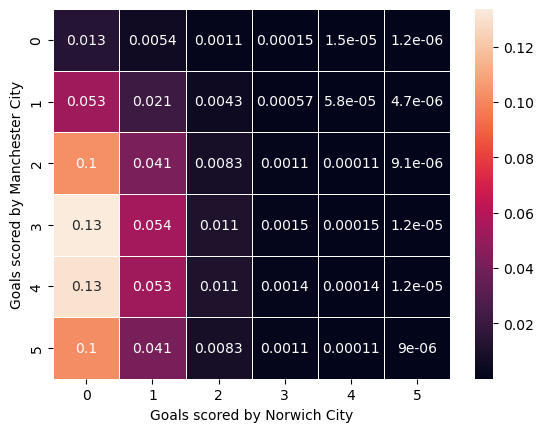

In [192]:
import seaborn as sns
ax = sns.heatmap(score_matrix, linewidth=0.7, annot=True)
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()